In [1]:

import seaborn as sns
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
import sys
import os

# Add the parent directory to sys.path
sys.path.append(os.path.abspath('..'))

In [3]:
import src.preprocessing as pre
from src.table import CherryTable
import src.utils as utils
import src.dataset as dataset


In [4]:
train, test, mapping_dict = pre.separate_year(planting_meta_path='../data/planting_meta.json', weekly_summary_path='../data/weekly_summary.csv')

In [5]:
meta = pre.decode(test, mapping_dict)

In [6]:
model =utils.train_harvest_model(train)

Epoch [1/5], Loss: 842017.7345
Epoch [2/5], Loss: 801090.9326
Epoch [3/5], Loss: 796706.0166
Epoch [4/5], Loss: 778629.5813
Epoch [5/5], Loss: 725870.7146


In [7]:
predictions = utils.predict_harvest(model, test)

In [8]:
actuals = test.Y_kilos.detach().numpy()

In [9]:
table = CherryTable(meta, {'predictions':predictions}, actuals)

In [16]:
a,b,c = table.graph_ready(ranches=True,classes=True)

In [18]:
b.keys()

dict_keys(['predictions_summed', 'predictions_summed_cumsum', 'predictions_summed_cumprop', 'actuals_summed', 'actuals_summed_cumsum', 'actuals_summed_cumprop'])

/var/folders/fb/78nymm551yn_7vm06j_3sk9w0000gn/T/ipykernel_77593/416281657.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


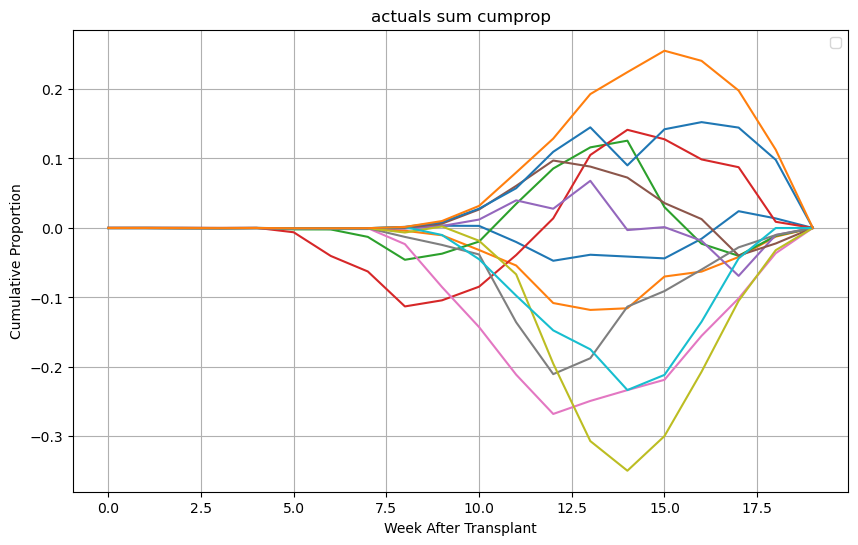

In [39]:
xlabel = 'Week After Transplant'
diff = b['predictions_summed_cumprop'] - b['actuals_summed_cumprop']
transposed = diff.T
plt.figure(figsize=(10,6))
plt.grid(True)

plt.plot(transposed)
plt.xlabel(xlabel)
plt.ylabel('Cumulative Proportion')
plt.title('actuals sum cumprop')
plt.legend()
plt.show()